In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.tools import HoverTool

from statsmodels.tsa.stattools import adfuller 
from numpy import log 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


Loading BokehJS ...

In [2]:
! pip install keras

In [3]:
! pip install tensorflow

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<a id='1'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">1. Data presentation</p>

<p style="text-align:center; "></a></p>

In [5]:
df = pd.read_csv('HistoricalData_apple.csv', parse_dates=['Date'], index_col=['Date'], na_values=['999.99'])

In [6]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-08,$152.87,47204790,$152.81,$153.47,$151.83
2023-03-07,$151.60,56182030,$153.70,$154.0299,$151.13
2023-03-06,$153.83,87558030,$153.785,$156.30,$153.46
2023-03-03,$151.03,70732300,$148.045,$151.11,$147.33
2023-03-02,$145.91,52279760,$144.38,$146.71,$143.90


In [7]:
df.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-03-15,$155.09,92964300,$150.90,$155.57,$150.38
2022-03-14,$150.62,108732100,$151.45,$154.12,$150.10
2022-03-11,$154.73,96970100,$158.93,$159.28,$154.50
2022-03-10,$158.52,105342000,$160.20,$160.39,$155.98
2022-03-09,$162.95,91454910,$161.475,$163.41,$159.41


<a id='1.1'></a>
# <font color='#900020'>1.1 Display "Close", "Open", "High" and "Low" share price curves</font>

In [8]:
df = df.replace({'\$':''}, regex = True)


df[['Close/Last', 'Open','High', 'Low']] =  df[['Close/Last', 'Open','High', 'Low']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-08 to 2022-03-09
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  251 non-null    float64
 1   Volume      251 non-null    int64  
 2   Open        251 non-null    float64
 3   High        251 non-null    float64
 4   Low         251 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [9]:
prices = df['2022-03-09':'2023-03-08']
prices.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-08,152.87,47204790,152.810,153.4700,151.83
2023-03-07,151.60,56182030,153.700,154.0299,151.13
2023-03-06,153.83,87558030,153.785,156.3000,153.46
2023-03-03,151.03,70732300,148.045,151.1100,147.33
2023-03-02,145.91,52279760,144.380,146.7100,143.90


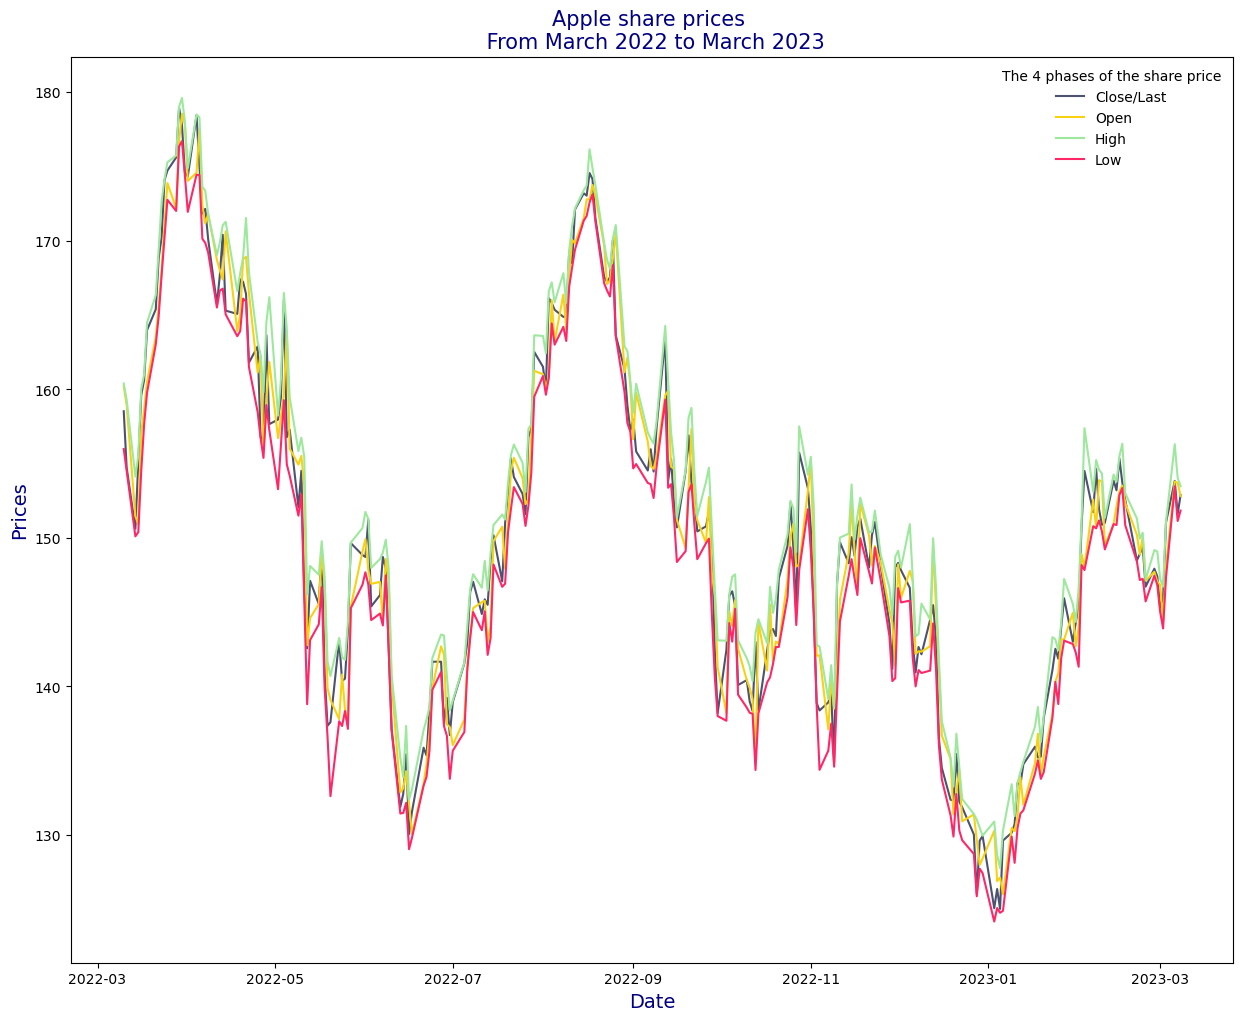

In [10]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12), dpi=100)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='Close/Last', data=prices, legend=True, color='#4C5270')
ax= sns.lineplot(x='Date', y='Open', data=prices, legend=True, color='#F8D210')
ax = sns.lineplot(x='Date', y='High', data=prices, legend=True, color='#9DE89C')
ax= sns.lineplot(x='Date', y='Low', data=prices, legend=True, color='#FF2768')

# Set title and labels for axes

plt.title("Apple share prices \n From March 2022 to March 2023", color='navy', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Prices', size=14, color='navy')
ax.legend(loc='best', title='The 4 phases of the share price', frameon=False, ncol= 1, 
          labels=['Close/Last', 'Open', 'High', 'Low'])
plt.show();

<a id='1.2'></a>
# <font color='#900020'>1.2 Interactive plot at market close</font>

In [11]:
df1 = pd.read_csv('HistoricalData_apple.csv')
df1 = df1.replace({'\$':''}, regex = True)


df1[['Close/Last', 'Open','High', 'Low']] =  df1[['Close/Last', 'Open','High', 'Low']].astype(float)
df1["Date"] = pd.to_datetime(df1["Date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Close/Last  251 non-null    float64       
 2   Volume      251 non-null    int64         
 3   Open        251 non-null    float64       
 4   High        251 non-null    float64       
 5   Low         251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [12]:
x = df1['Date']
y = df1['Close/Last']

source1 = ColumnDataSource({'Dates': x, 'Prices Close' : y})

p = figure(width =800, height = 500, x_axis_type='datetime', title="Apple closing share price\nFrom March 2022 to March 2023")

c = p.line(x='Dates', y='Prices Close', source=source1, color='#005BEA')

h = HoverTool (renderers = [c], tooltips = [("Date" , '$x{%F}'),('Price' , '$y'), ("(index)", "($indices)")], 
               formatters={'$x': 'datetime'}) 
p.add_tools(h)

show(p);

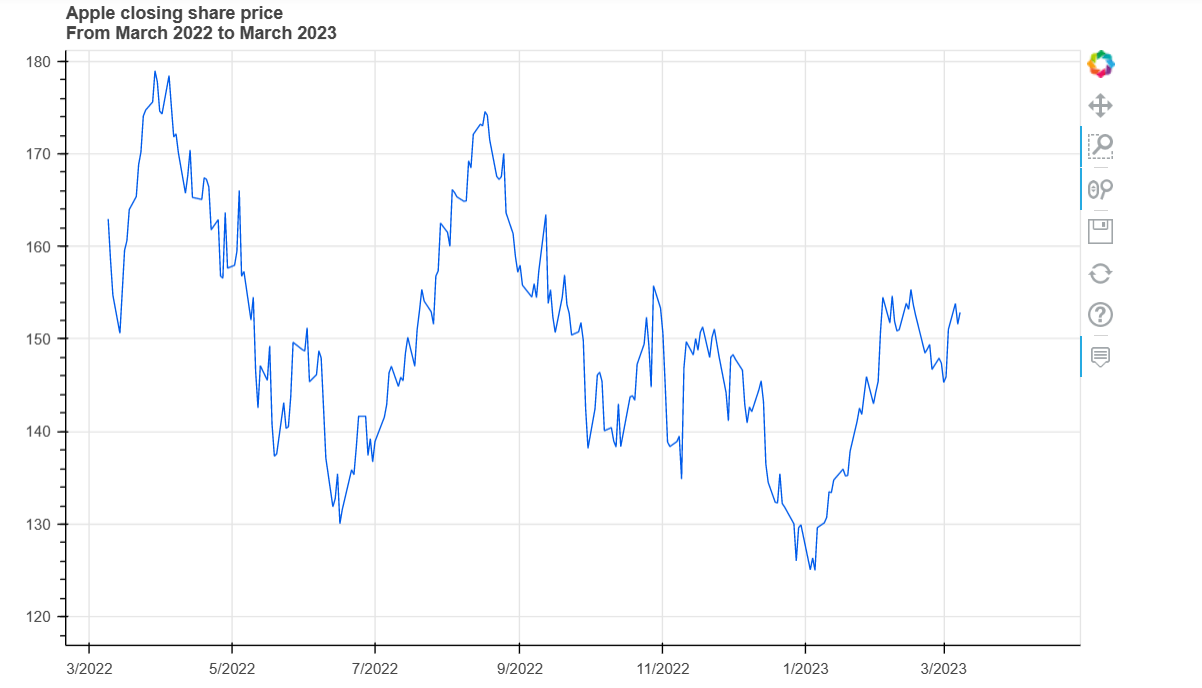

<a id='2'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">2. Time series</p>

<p style="text-align:center; "></a></p>

In [13]:
df_stats = df1['Close/Last']
df_stats.index = df1['Date']
df_stats.sort_index(ascending=True, inplace=True)
df_stats

Date
2022-03-09    162.95
2022-03-10    158.52
2022-03-11    154.73
2022-03-14    150.62
2022-03-15    155.09
               ...  
2023-03-02    145.91
2023-03-03    151.03
2023-03-06    153.83
2023-03-07    151.60
2023-03-08    152.87
Name: Close/Last, Length: 251, dtype: float64

In [14]:
df_stats.index

DatetimeIndex(['2022-03-09', '2022-03-10', '2022-03-11', '2022-03-14',
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-21', '2022-03-22',
               ...
               '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07', '2023-03-08'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

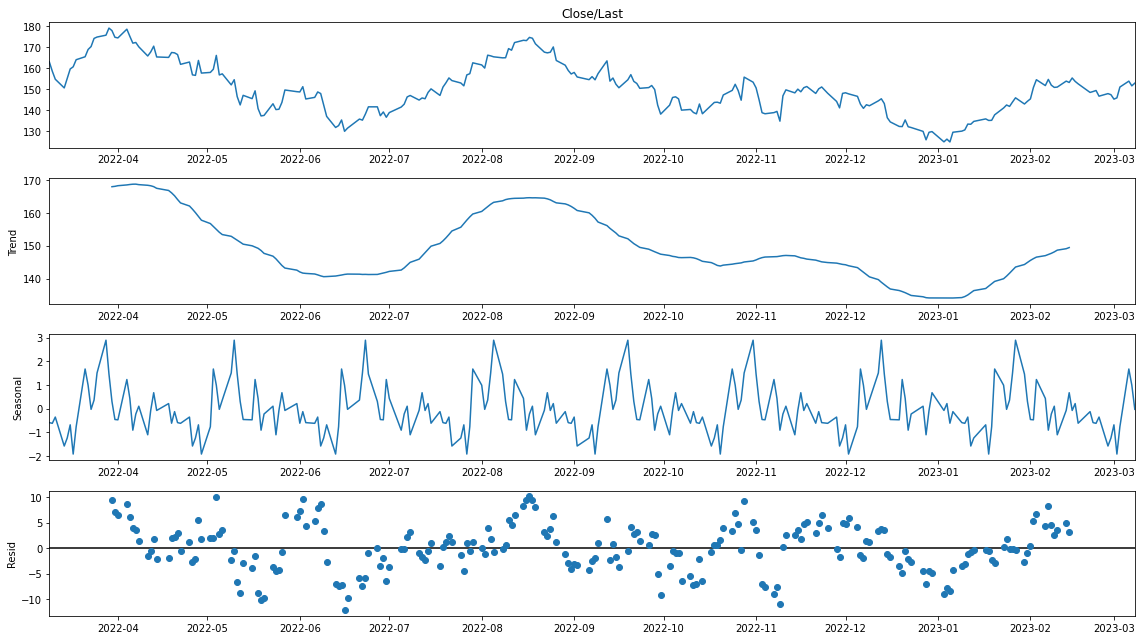

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive model
sd = seasonal_decompose(df_stats, model='additive', filt=None, period=30)
fig = sd.plot()
fig.set_size_inches((16,9))
fig.tight_layout()
plt.show();

**The residual shows great variations as a function of time. In theory, a decomposition is considered successful if the residual part can be assimilated to what is known as weak white noise. However, data from the additive model show a high degree of volatility over a year of observation. This should be taken into account when developing a forecasting model for this series. I'm going to use the multiplicative model to see if the residual is better.**

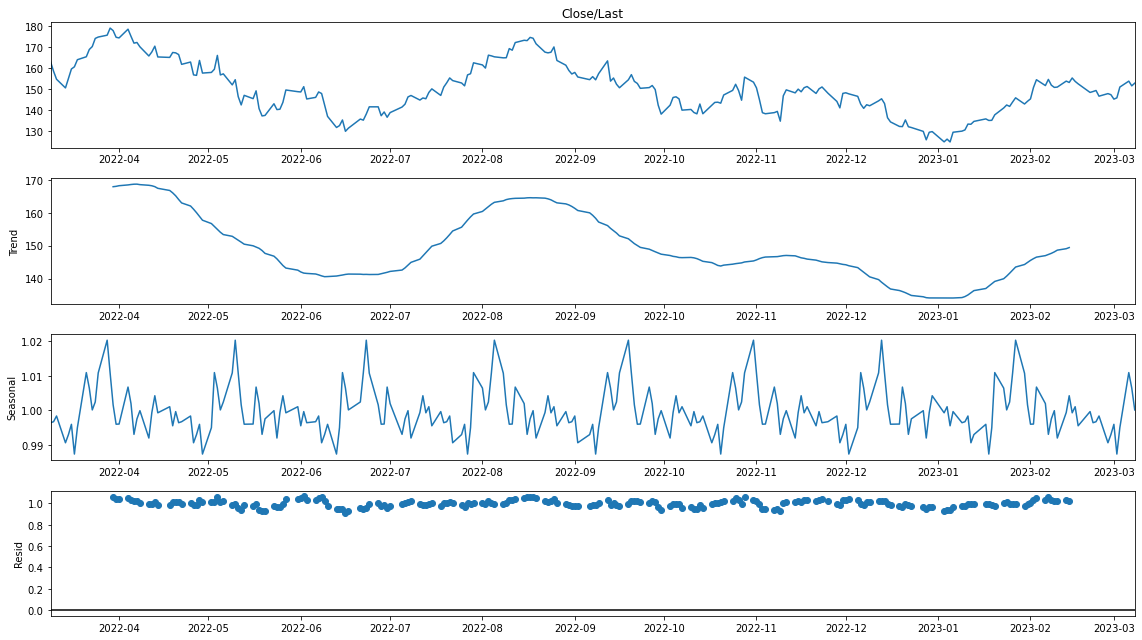

In [16]:
# Multiplicative model
sd = seasonal_decompose(df_stats, model='multiplicative', filt=None, period=30)
fig = sd.plot()
fig.set_size_inches((16,9))
fig.tight_layout()
plt.show();

<a id='2.1'></a>
# <font color='#900020'>2.1 AD Fuller test</font>

In [17]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, hence ACCEPT Ho. that the series is not stationary.')

In [18]:
adfuller_test(df_stats)

ADF Test Statistic: -2.3173744534406446
p-value: 0.16642557813516728
Weak evidence against null hypothesis, hence ACCEPT Ho. that the series is not stationary.


<a id='2.2'></a>
# <font color='#900020'>2.2 Autocorrelation with plot_pacf and plot_acf</font>

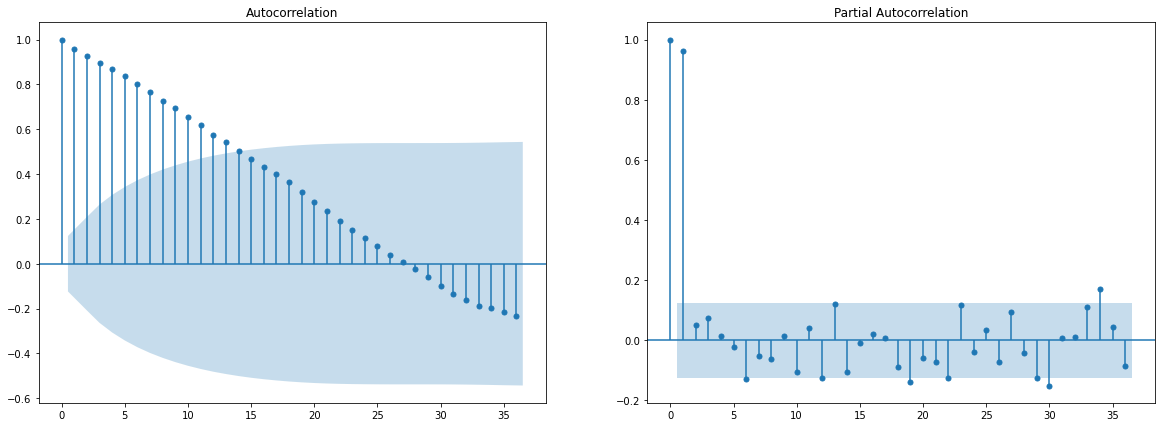

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(df_stats, lags = 36, ax=ax1)
plot_pacf(df_stats, lags = 36, ax=ax2) 
plt.show();

In [20]:
model=sm.tsa.SARIMAX(df_stats,order=(1,1,1),seasonal_order=(0,1,1,36))
sarima=model.fit()
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 36)   Log Likelihood                -588.391
Date:                            Fri, 07 Jul 2023   AIC                           1184.781
Time:                                    15:33:03   BIC                           1198.245
Sample:                                         0   HQIC                          1190.222
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8900      0.065    -13.701      0.000      -1.017      -0.763
ma.L1          0.9677      0.046   

The Ljung-Box test is a residual whiteness test. It is a statistical test that aims to reject or not the hypothesis H0: The residual is white noise. Here, the Prob(Q) line shows that the p-value of this test is 0.42, so the hypothesis is not rejected.

The Jarque-Bera test is a normality test. It is a statistical test designed to reject or not the hypothesis H0: The residual follows a normal distribution. Here we read on the Prob (JB) line that the p-value of the test is 0.10. The hypothesis is therefore not rejected.

<a id='3'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">3. Application of LSTM model</p>

<p style="text-align:center; "></a></p>

In [21]:
df_LSTM = pd.DataFrame(df1['Close/Last'])
df_LSTM

,Close/Last
Date,
2022-03-09,162.95
2022-03-10,158.52
2022-03-11,154.73
2022-03-14,150.62
2022-03-15,155.09
...,...
2023-03-02,145.91
2023-03-03,151.03
2023-03-06,153.83


In [22]:
scaler=MinMaxScaler(feature_range=(0,1))

In [23]:
final_data = df_LSTM.values
train_data= pd.DataFrame(final_data[0:200,:], columns=['values'])
valid_data= pd.DataFrame(final_data[200:,:], columns=['values'])


In [24]:
final_data

array([[162.95],
       [158.52],
       [154.73],
       [150.62],
       [155.09],
       [159.59],
       [160.62],
       [163.98],
       [165.38],
       [168.82],
       [170.21],
       [174.07],
       [174.72],
       [175.6 ],
       [178.96],
       [177.77],
       [174.61],
       [174.31],
       [178.44],
       [175.06],
       [171.83],
       [172.14],
       [170.09],
       [165.75],
       [167.66],
       [170.4 ],
       [165.29],
       [165.07],
       [167.4 ],
       [167.23],
       [166.42],
       [161.79],
       [162.88],
       [156.8 ],
       [156.57],
       [163.64],
       [157.65],
       [157.96],
       [159.48],
       [166.02],
       [156.77],
       [157.28],
       [152.06],
       [154.51],
       [146.5 ],
       [142.56],
       [147.11],
       [145.54],
       [149.24],
       [140.82],
       [137.35],
       [137.59],
       [143.11],
       [140.36],
       [140.52],
       [143.78],
       [149.64],
       [148.84],
       [148.71

In [25]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
195,136.50
196,134.51
197,132.37
198,132.30


In [26]:
train_data.shape

(200, 1)

In [27]:
valid_data

,values
0,132.23
1,131.86
2,130.03
3,126.04
4,129.61
5,129.93
6,125.07
7,126.36
8,125.02
9,129.62


In [28]:
valid_data.shape

(51, 1)

In [29]:
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(51,len(train_data)):
    x_train_data.append(scaled_data[i-51:i,0]) # 51 correspond au nombre de lignes dans valid data
    y_train_data.append(scaled_data[i,0])

In [30]:
x_train_data = pd.DataFrame(x_train_data)

In [31]:
y_train_data = pd.DataFrame(y_train_data)

In [32]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=40,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=40))
lstm_model.add(Dense(1))


In [33]:
model_data=final_data[len(final_data)-len(valid_data)-51:]
model_data

array([[138.98],
       [138.34],
       [142.99],
       [138.38],
       [142.41],
       [143.75],
       [143.86],
       [143.39],
       [147.27],
       [149.45],
       [152.34],
       [149.35],
       [144.8 ],
       [155.74],
       [153.34],
       [150.65],
       [145.03],
       [138.88],
       [138.38],
       [138.92],
       [139.5 ],
       [134.87],
       [146.87],
       [149.7 ],
       [148.28],
       [150.04],
       [148.79],
       [150.72],
       [151.29],
       [148.01],
       [150.18],
       [151.07],
       [148.11],
       [144.22],
       [141.17],
       [148.03],
       [148.31],
       [147.81],
       [146.63],
       [142.91],
       [140.94],
       [142.65],
       [142.16],
       [144.49],
       [145.47],
       [143.21],
       [136.5 ],
       [134.51],
       [132.37],
       [132.3 ],
       [135.45],
       [132.23],
       [131.86],
       [130.03],
       [126.04],
       [129.61],
       [129.93],
       [125.07],
       [126.36

In [34]:
model_data = model_data.reshape(-1,1)
model_data = scaler.transform(model_data)

In [35]:
model_data

array([[0.25880608],
       [0.24694105],
       [0.33314794],
       [0.24768261],
       [0.32239525],
       [0.34723767],
       [0.34927697],
       [0.34056359],
       [0.41249537],
       [0.45291064],
       [0.50648869],
       [0.45105673],
       [0.36670374],
       [0.56952169],
       [0.52502781],
       [0.47515758],
       [0.37096774],
       [0.25695217],
       [0.24768261],
       [0.25769373],
       [0.26844642],
       [0.18261031],
       [0.40507972],
       [0.45754542],
       [0.43121987],
       [0.46384872],
       [0.44067482],
       [0.47645532],
       [0.48702262],
       [0.42621431],
       [0.4664442 ],
       [0.48294401],
       [0.42806822],
       [0.35595106],
       [0.29940675],
       [0.42658509],
       [0.43177605],
       [0.42250649],
       [0.40063033],
       [0.33166481],
       [0.29514275],
       [0.32684464],
       [0.31776047],
       [0.36095662],
       [0.37912495],
       [0.33722655],
       [0.21282907],
       [0.175

In [36]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data, epochs=1,batch_size=1,verbose=2)


149/149 - 5s - loss: 0.0197 - 5s/epoch - 32ms/step


In [37]:
X_test=[]
for i in range(51,model_data.shape[0]):
    X_test.append(model_data[i-51:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [38]:
X_test

array([[[0.25880608],
        [0.24694105],
        [0.33314794],
        ...,
        [0.13626251],
        [0.13496478],
        [0.193363  ]],

       [[0.24694105],
        [0.33314794],
        [0.24768261],
        ...,
        [0.13496478],
        [0.193363  ],
        [0.13366704]],

       [[0.33314794],
        [0.24768261],
        [0.32239525],
        ...,
        [0.193363  ],
        [0.13366704],
        [0.12680756]],

       ...,

       [[0.13626251],
        [0.13496478],
        [0.193363  ],
        ...,
        [0.37615869],
        [0.38728217],
        [0.48220245]],

       [[0.13496478],
        [0.193363  ],
        [0.13366704],
        ...,
        [0.38728217],
        [0.48220245],
        [0.53411198]],

       [[0.193363  ],
        [0.13366704],
        [0.12680756],
        ...,
        [0.48220245],
        [0.53411198],
        [0.49276974]]])

In [39]:
X_test.shape

(51, 51, 1)

In [40]:
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 16ms/step


In [41]:
valid_data['Predictions']=predicted_stock_price
valid_data

,values,Predictions
0,132.23,140.818420
1,131.86,139.853073
2,130.03,138.945953
3,126.04,138.017014
4,129.61,136.879868
5,129.93,135.963715
6,125.07,135.257553
7,126.36,134.394409
8,125.02,133.604706
9,129.62,132.826187


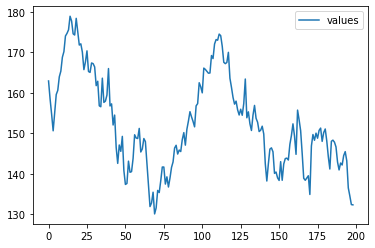

In [42]:
train_data = pd.DataFrame(final_data[:199],columns=['values'])
train_data.plot();

In [43]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
194,143.21
195,136.50
196,134.51
197,132.37


In [44]:
valid_data= pd.DataFrame(final_data[200:],columns=['values'])
valid_data['Predictions']=predicted_stock_price
valid_data['Index'] = np.arange(200, 251, 1)
valid_data.set_index('Index', inplace=True)
valid_data

,values,Predictions
Index,,
200,132.23,140.818420
201,131.86,139.853073
202,130.03,138.945953
203,126.04,138.017014
204,129.61,136.879868
205,129.93,135.963715
206,125.07,135.257553
207,126.36,134.394409
208,125.02,133.604706


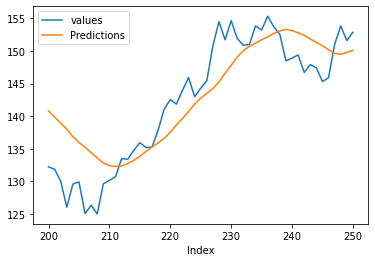

In [45]:
valid_data.plot();

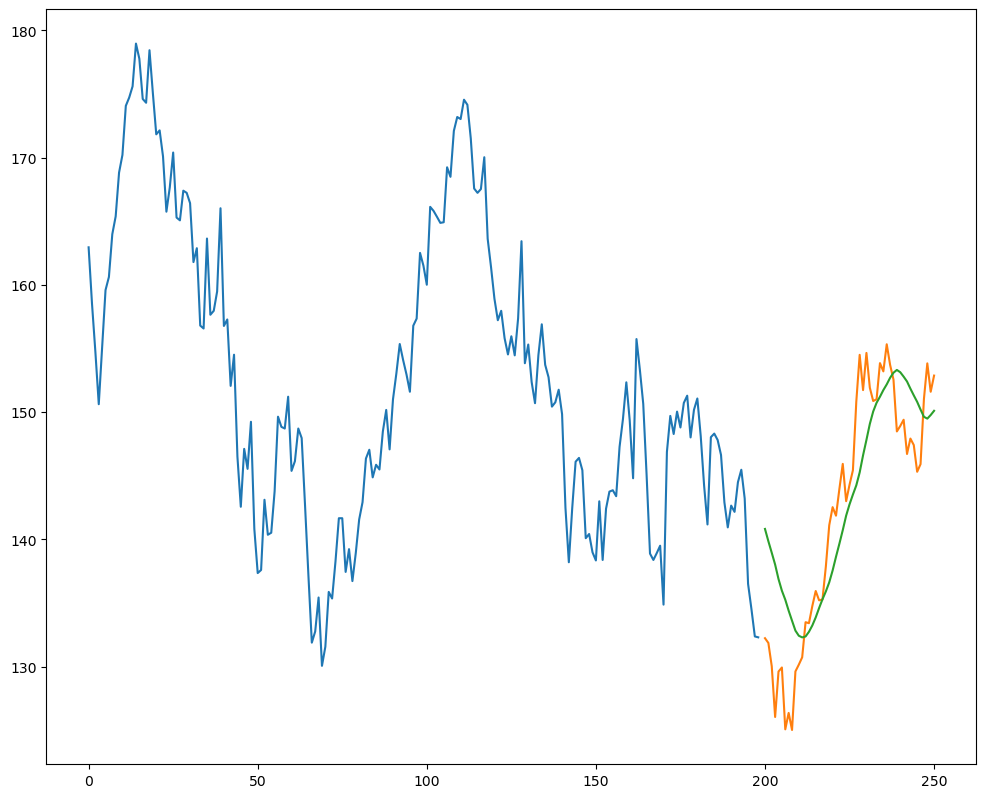

In [46]:
plt.figure(figsize=(12,10), dpi=100)
plt.plot(train_data["values"])
plt.plot(valid_data[['values',"Predictions"]]);

<a id='4'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">4. Application of Random Forest model</p>

<p style="text-align:center; "></a></p>

After using LSTM, I'm going to use more traditional Machine Learning models to predict apple stock prices. 

I'll need my 'prices' df for this part of the demo.


In [47]:
df2 = prices
df2

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-08,152.87,47204790,152.810,153.4700,151.83
2023-03-07,151.60,56182030,153.700,154.0299,151.13
2023-03-06,153.83,87558030,153.785,156.3000,153.46
2023-03-03,151.03,70732300,148.045,151.1100,147.33
2023-03-02,145.91,52279760,144.380,146.7100,143.90
...,...,...,...,...,...
2022-03-16,159.59,102300200,157.050,160.0000,154.46
2022-03-15,155.09,92964300,150.900,155.5700,150.38
2022-03-14,150.62,108732100,151.450,154.1200,150.10


In [48]:
# Prepare the data for training by dividing the dataframe into training variables (X) and the target variable (y):
X = df2.drop('Close/Last', axis=1)
y = df2['Close/Last']

In [49]:
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Linear Regression
rl = LinearRegression()
rl.fit(X_train, y_train)

#Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

#Random Forest Regressor
rfr = RandomForestRegressor(random_state=42) 
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
### Linear Regression
y_pred_rl = rl.predict(X_test)
y_pred_train_rl = rl.predict(X_train)

# Metrics Linear Regression

# Train 
score_rl_train = rl.score(X_train, y_train)
mae_rl_train = mean_absolute_error(y_train,y_pred_train_rl)
mse_rl_train = mean_squared_error(y_train,y_pred_train_rl,squared=True)
rmse_rl_train = mean_squared_error(y_train,y_pred_train_rl,squared=False)

# Test
score_rl_test = rl.score(X_test, y_test)
mae_rl_test = mean_absolute_error(y_test,y_pred_rl)
mse_rl_test = mean_squared_error(y_test,y_pred_rl,squared=True)
rmse_rl_test = mean_squared_error(y_test,y_pred_rl,squared=False)


### Decision Tree Regressor
y_pred_dtr = dtr.predict(X_test)
y_pred_train_dtr = dtr.predict(X_train)

# Metrics Decision Tree Regressor

# Train
score_dtr_train = dtr.score(X_train, y_train)
mae_dtr_train = mean_absolute_error(y_train,y_pred_train_dtr)
mse_dtr_train = mean_squared_error(y_train,y_pred_train_dtr,squared=True)
rmse_dtr_train = mean_squared_error(y_train,y_pred_train_dtr,squared=False)

# Test 
score_dtr_test = dtr.score(X_test, y_test)
mae_dtr_test = mean_absolute_error(y_test,y_pred_dtr)
mse_dtr_test = mean_squared_error(y_test,y_pred_dtr,squared=True)
rmse_dtr_test = mean_squared_error(y_test,y_pred_dtr,squared=False)


### Random Forest
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr_train = rfr.predict(X_train)

# Metrics Random Forest

# Train
score_rfr_train = rfr.score(X_train, y_train)
mae_rfr_train = mean_absolute_error(y_train,y_pred_rfr_train)
mse_rfr_train = mean_squared_error(y_train,y_pred_rfr_train,squared=True)
rmse_rfr_train = mean_squared_error(y_train,y_pred_rfr_train,squared=False)

# Test 
score_rfr_test = rfr.score(X_test, y_test)
mae_rfr_test = mean_absolute_error(y_test,y_pred_rfr)
mse_rfr_test = mean_squared_error(y_test,y_pred_rfr,squared=True)
rmse_rfr_test = mean_squared_error(y_test,y_pred_rfr,squared=False)

# Creating a dataframe to compare metrics 
scores = pd.DataFrame({'TRAIN Score': [score_rl_train,score_dtr_train,score_rfr_train],
        'TEST Score': [score_rl_test, score_dtr_test,score_rfr_test],
        'Train MAE': [mae_rl_train, mae_dtr_train, mae_rfr_train],
        'Test MAE': [mae_rl_test, mae_dtr_test, mae_rfr_test],
        'Train MSE': [mse_rl_train, mse_dtr_train,mse_rfr_train],
        'Test MSE': [mse_rl_test, mse_dtr_test,mse_rfr_test],
        'Train RMSE': [rmse_rl_train, rmse_dtr_train, rmse_rfr_train],
        'Test RMSE': [rmse_rl_test, rmse_dtr_test, rmse_rfr_test]},
                    index = ['Linear Regression', 'Decision Tree', 'Random Forest'])

scores

,TRAIN Score,TEST Score,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression,0.992674,0.990400,0.796615,0.895231,1.052018,1.286938,1.025679,1.134433
Decision Tree,1.000000,0.966180,0.000000,1.629000,0.000000,4.533770,0.000000,2.129265
Random Forest,0.997481,0.983793,0.462658,1.223172,0.361699,2.172689,0.601414,1.474005


<a id='4.1'></a>
# <font color='#900020'>4.1 Predicted values with Linear Regression</font>

In [55]:
predicted_rl = pd.DataFrame(y_train)
predicted_rl['Predicted_values'] = y_pred_train_rl

predicted_rl

,Close/Last,Predicted_values
Date,,
2022-08-26,163.62,164.290565
2022-04-13,170.40,169.862682
2022-03-25,174.72,174.257531
2022-09-15,152.37,152.468829
2022-08-22,167.57,167.606447
...,...,...
2022-10-04,146.10,145.853397
2023-02-15,155.33,155.072651
2022-10-24,149.45,148.805203


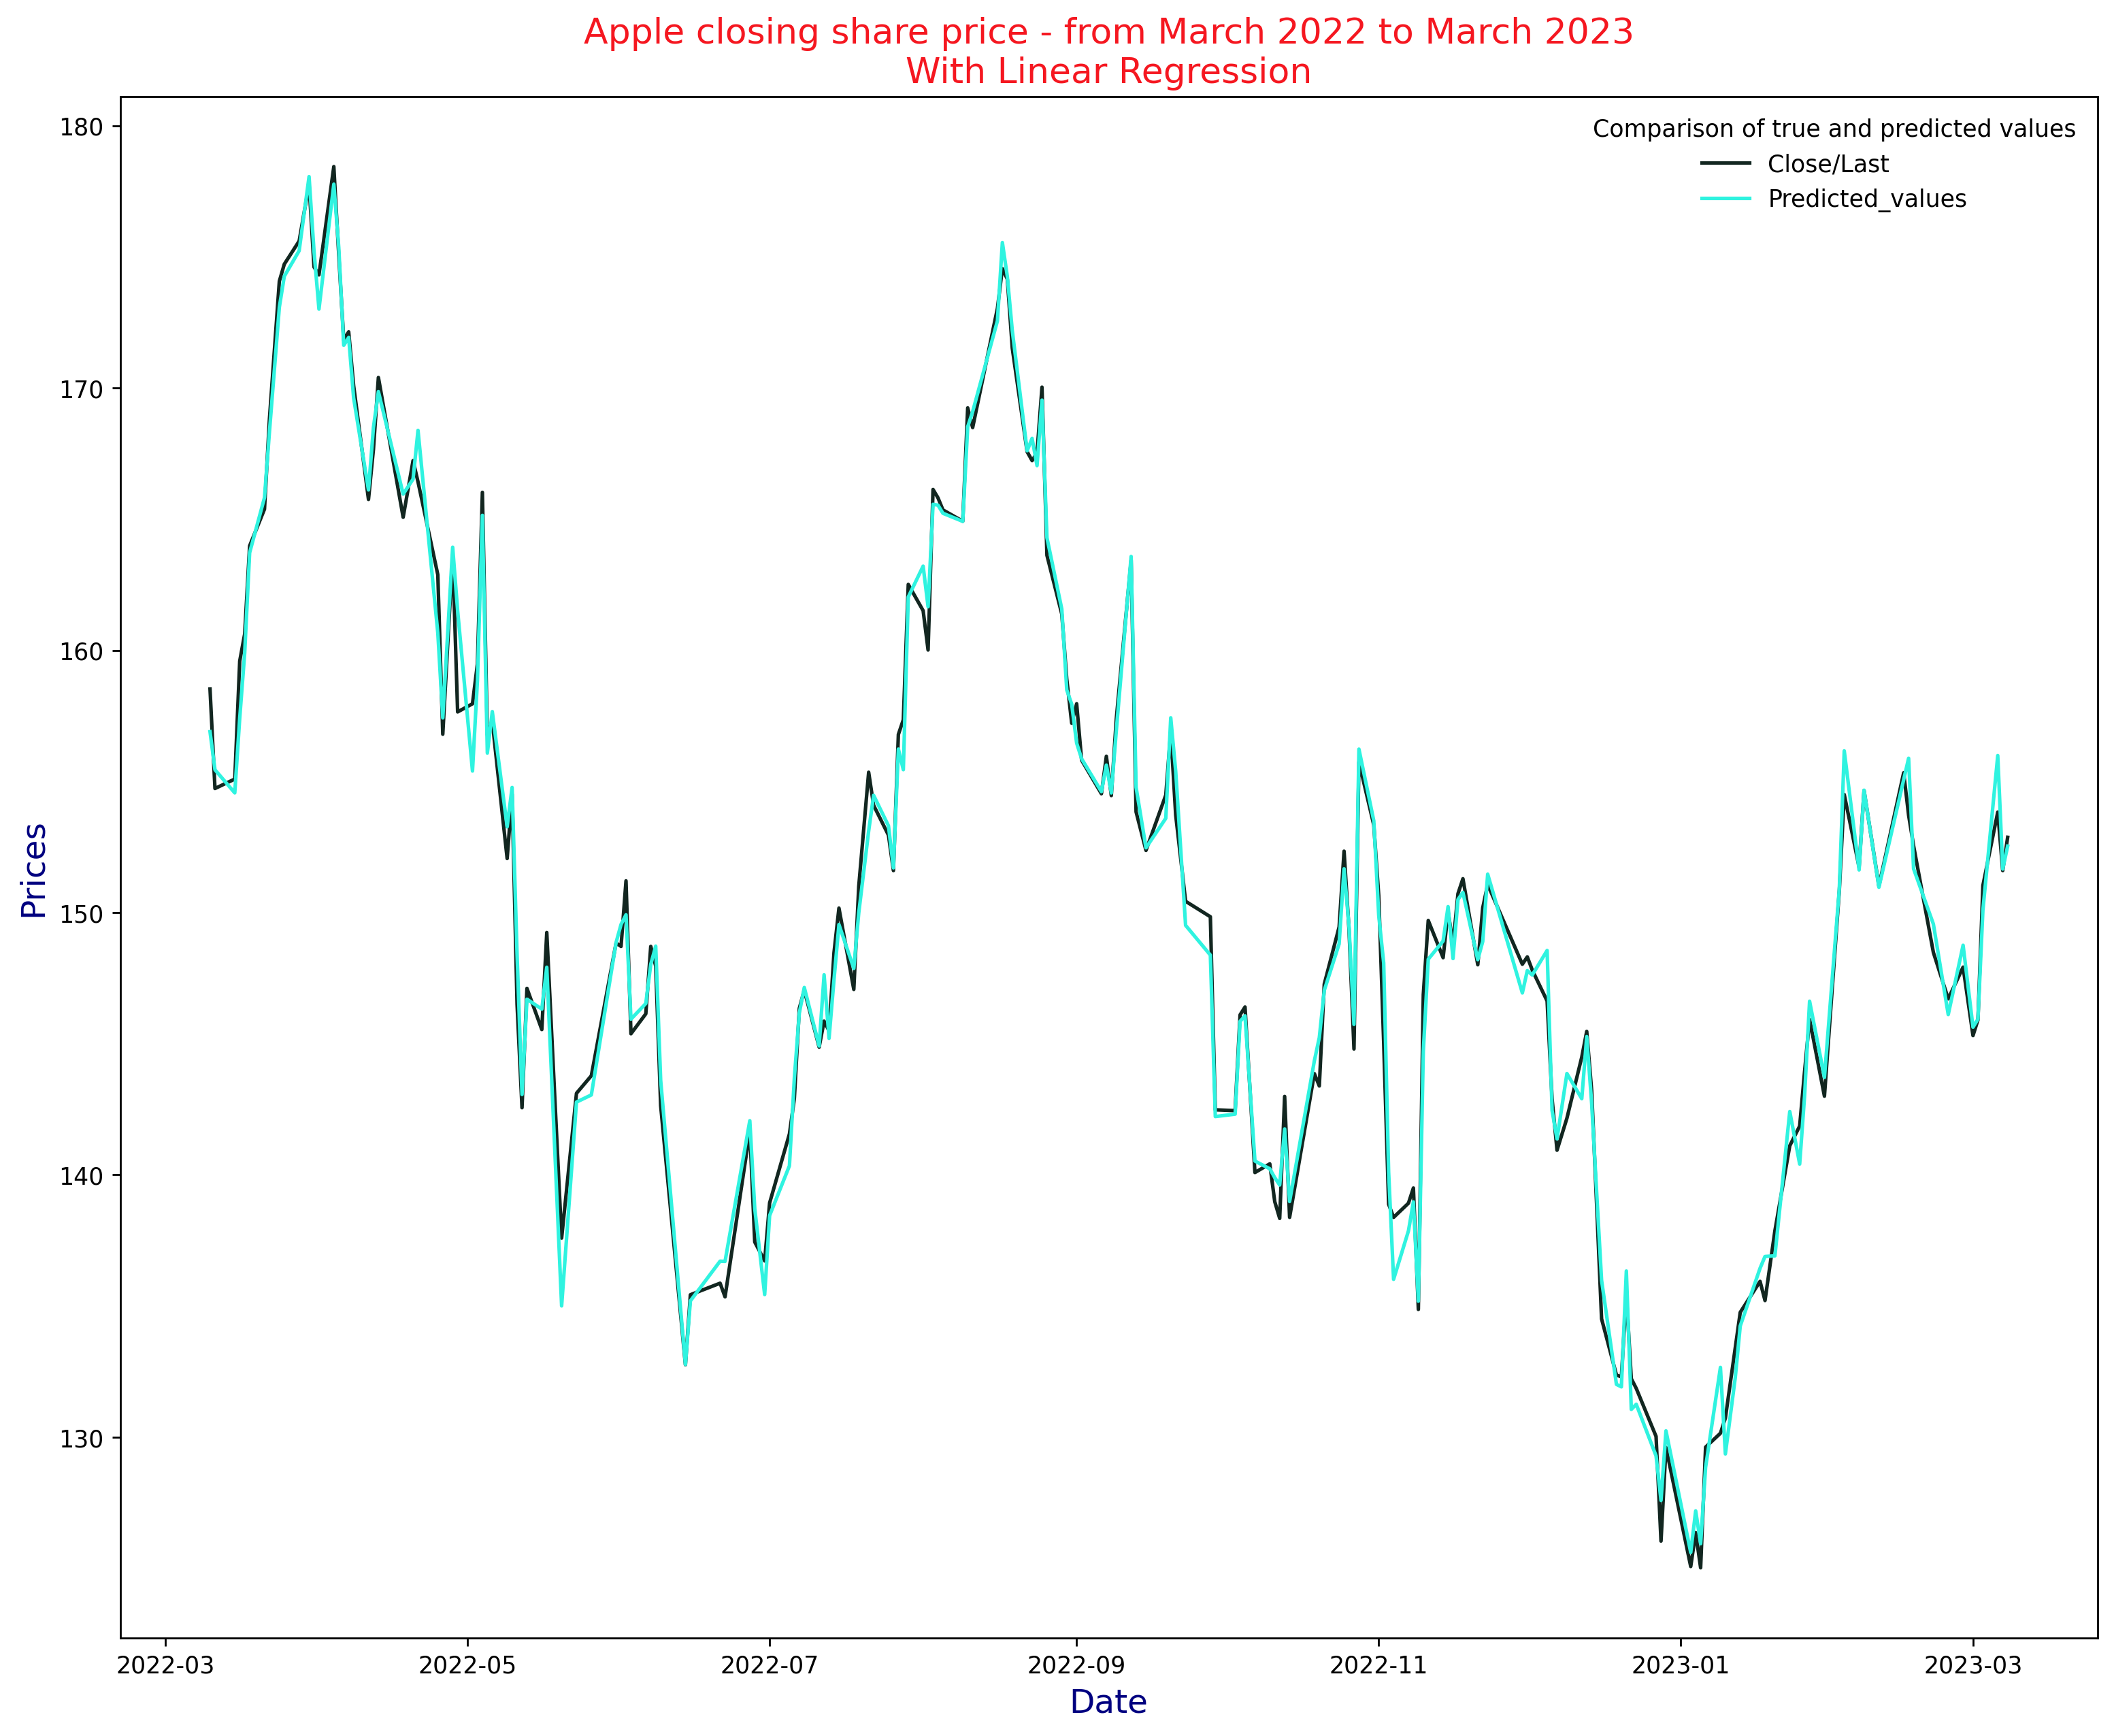

In [56]:
# Create figure 
fig, ax = plt.subplots(figsize=(15, 12), dpi=250)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='Close/Last', data=predicted_rl, legend=True, color='#122620')
ax= sns.lineplot(x='Date', y='Predicted_values', data=predicted_rl, legend=True, color='#2FF3E0')

plt.title("Apple closing share price - from March 2022 to March 2023\nWith Linear Regression", color='#F51720', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Prices', size=14, color='navy')
ax.legend(loc='best', title='Comparison of true and predicted values', frameon=False, ncol= 1, 
          labels=['Close/Last', 'Predicted_values'])
plt.show();

In [57]:
# Creation of 'diff' and 'diff_in_%' variables to compare the difference between the actual value and the predicted value. 
predicted_rl['diff'] = predicted_rl['Close/Last'] - predicted_rl['Predicted_values']
predicted_rl['diff_in_%'] = predicted_rl['diff']/predicted_rl['Predicted_values']*100
predicted_rl

,Close/Last,Predicted_values,diff,diff_in_%
Date,,,,
2022-08-26,163.62,164.290565,-0.670565,-0.408158
2022-04-13,170.40,169.862682,0.537318,0.316325
2022-03-25,174.72,174.257531,0.462469,0.265394
2022-09-15,152.37,152.468829,-0.098829,-0.064819
2022-08-22,167.57,167.606447,-0.036447,-0.021745
...,...,...,...,...
2022-10-04,146.10,145.853397,0.246603,0.169076
2023-02-15,155.33,155.072651,0.257349,0.165954
2022-10-24,149.45,148.805203,0.644797,0.433316


The "diff_in_%" variable represents the percentage loss or gain that may occur between the actual value and the predicted value. 

For example, on February 15, 2022, Apple shares were worth 155.33 dollars. My predicted value for the same date was 155.072 dollars, a difference of 0.257 dollars. My predicted value is slightly below the actual value, which represents a difference of around 0.167%, i.e. an insignificant difference. 

Another example with the highest difference: on May 20, 2022, the share value was 137.59 dollars versus 135.004 dollars for the predicted value, a difference of 2.585 dollars. This represents a gain of 1.91%. Not a huge gain. 

Let's take the case of a negative spread: on April 29, 2022, Apple shares were worth 157.65 dollars against a predicted value of $161.51, i.e. an upward spread of the predicted price of 3,864 dollars (the share price was predicted to be 3,864 dollars more expensive than the actual value). This represents a 2.392% difference between the actual and predicted values. In this case, it was the prediction that outperformed the actual value. 

In conclusion, the predicted values are very close to reality. The deviations are largely acceptable for the Linear Regression model. 

In [58]:
# The 10 highest differences 
predicted_rl.nlargest(10, 'diff_in_%', keep='all')

,Close/Last,Predicted_values,diff,diff_in_%
Date,,,,
2022-05-20,137.59,135.004454,2.585546,1.915156
2022-11-04,138.38,136.018649,2.361351,1.736049
2022-05-02,157.96,155.395451,2.564549,1.650337
2022-11-10,146.87,144.710008,2.159992,1.492635
2022-07-21,155.35,153.108684,2.241316,1.463872
2022-03-16,159.59,157.415697,2.174303,1.381249
2022-04-25,162.88,160.661039,2.218961,1.381144
2022-07-28,157.35,155.447463,1.902537,1.223910
2022-12-12,144.49,142.903738,1.586262,1.110022


In [59]:
# The 10 smallest differences in %
predicted_rl.nsmallest(10, 'diff_in_%', keep='all')

,Close/Last,Predicted_values,diff,diff_in_%
Date,,,,
2022-04-29,157.65,161.514373,-3.864373,-2.392587
2022-11-02,145.03,148.079580,-3.049580,-2.059420
2023-01-09,130.15,132.661799,-2.511799,-1.893385
2023-02-16,153.71,155.883422,-2.173422,-1.394261
2023-03-06,153.83,155.985790,-2.155790,-1.382042
2022-12-05,146.63,148.554777,-1.924777,-1.295668
2022-05-11,146.50,148.417049,-1.917049,-1.291664
2022-10-20,143.39,145.233395,-1.843395,-1.269264
2023-01-18,135.21,136.889723,-1.679723,-1.227063


In [60]:
# Presentation of statistical data from the 'Predicted_rl' dataframe
predicted_rl.describe()

,Close/Last,Predicted_values,diff,diff_in_%
count,200.000000,200.000000,2.000000e+02,200.000000
mean,150.912700,150.912700,1.634248e-14,-0.000062
std,12.013281,11.969194,1.028253e+00,0.693392
min,125.020000,125.604519,-3.864373e+00,-2.392587
25%,142.972500,143.001533,-6.328015e-01,-0.425766
50%,149.940000,149.527995,2.597637e-02,0.017030
75%,157.727500,157.421937,6.119475e-01,0.401681
max,178.440000,178.056773,2.585546e+00,1.915156


### How can we interpret the Describe table to understand Apple's share price over one year?

**It's the 'diff_in_%' variable that's interesting to study. In the predictions of the Linear Regression model, the Describe table shows that buying or selling Apple shares can result in a loss of up to 2.39% and a gain of up to 1.91%. This represents a very low risk. This means that the Linear Regression model is accurate in its predictions, as the error deviations are very small indeed.**

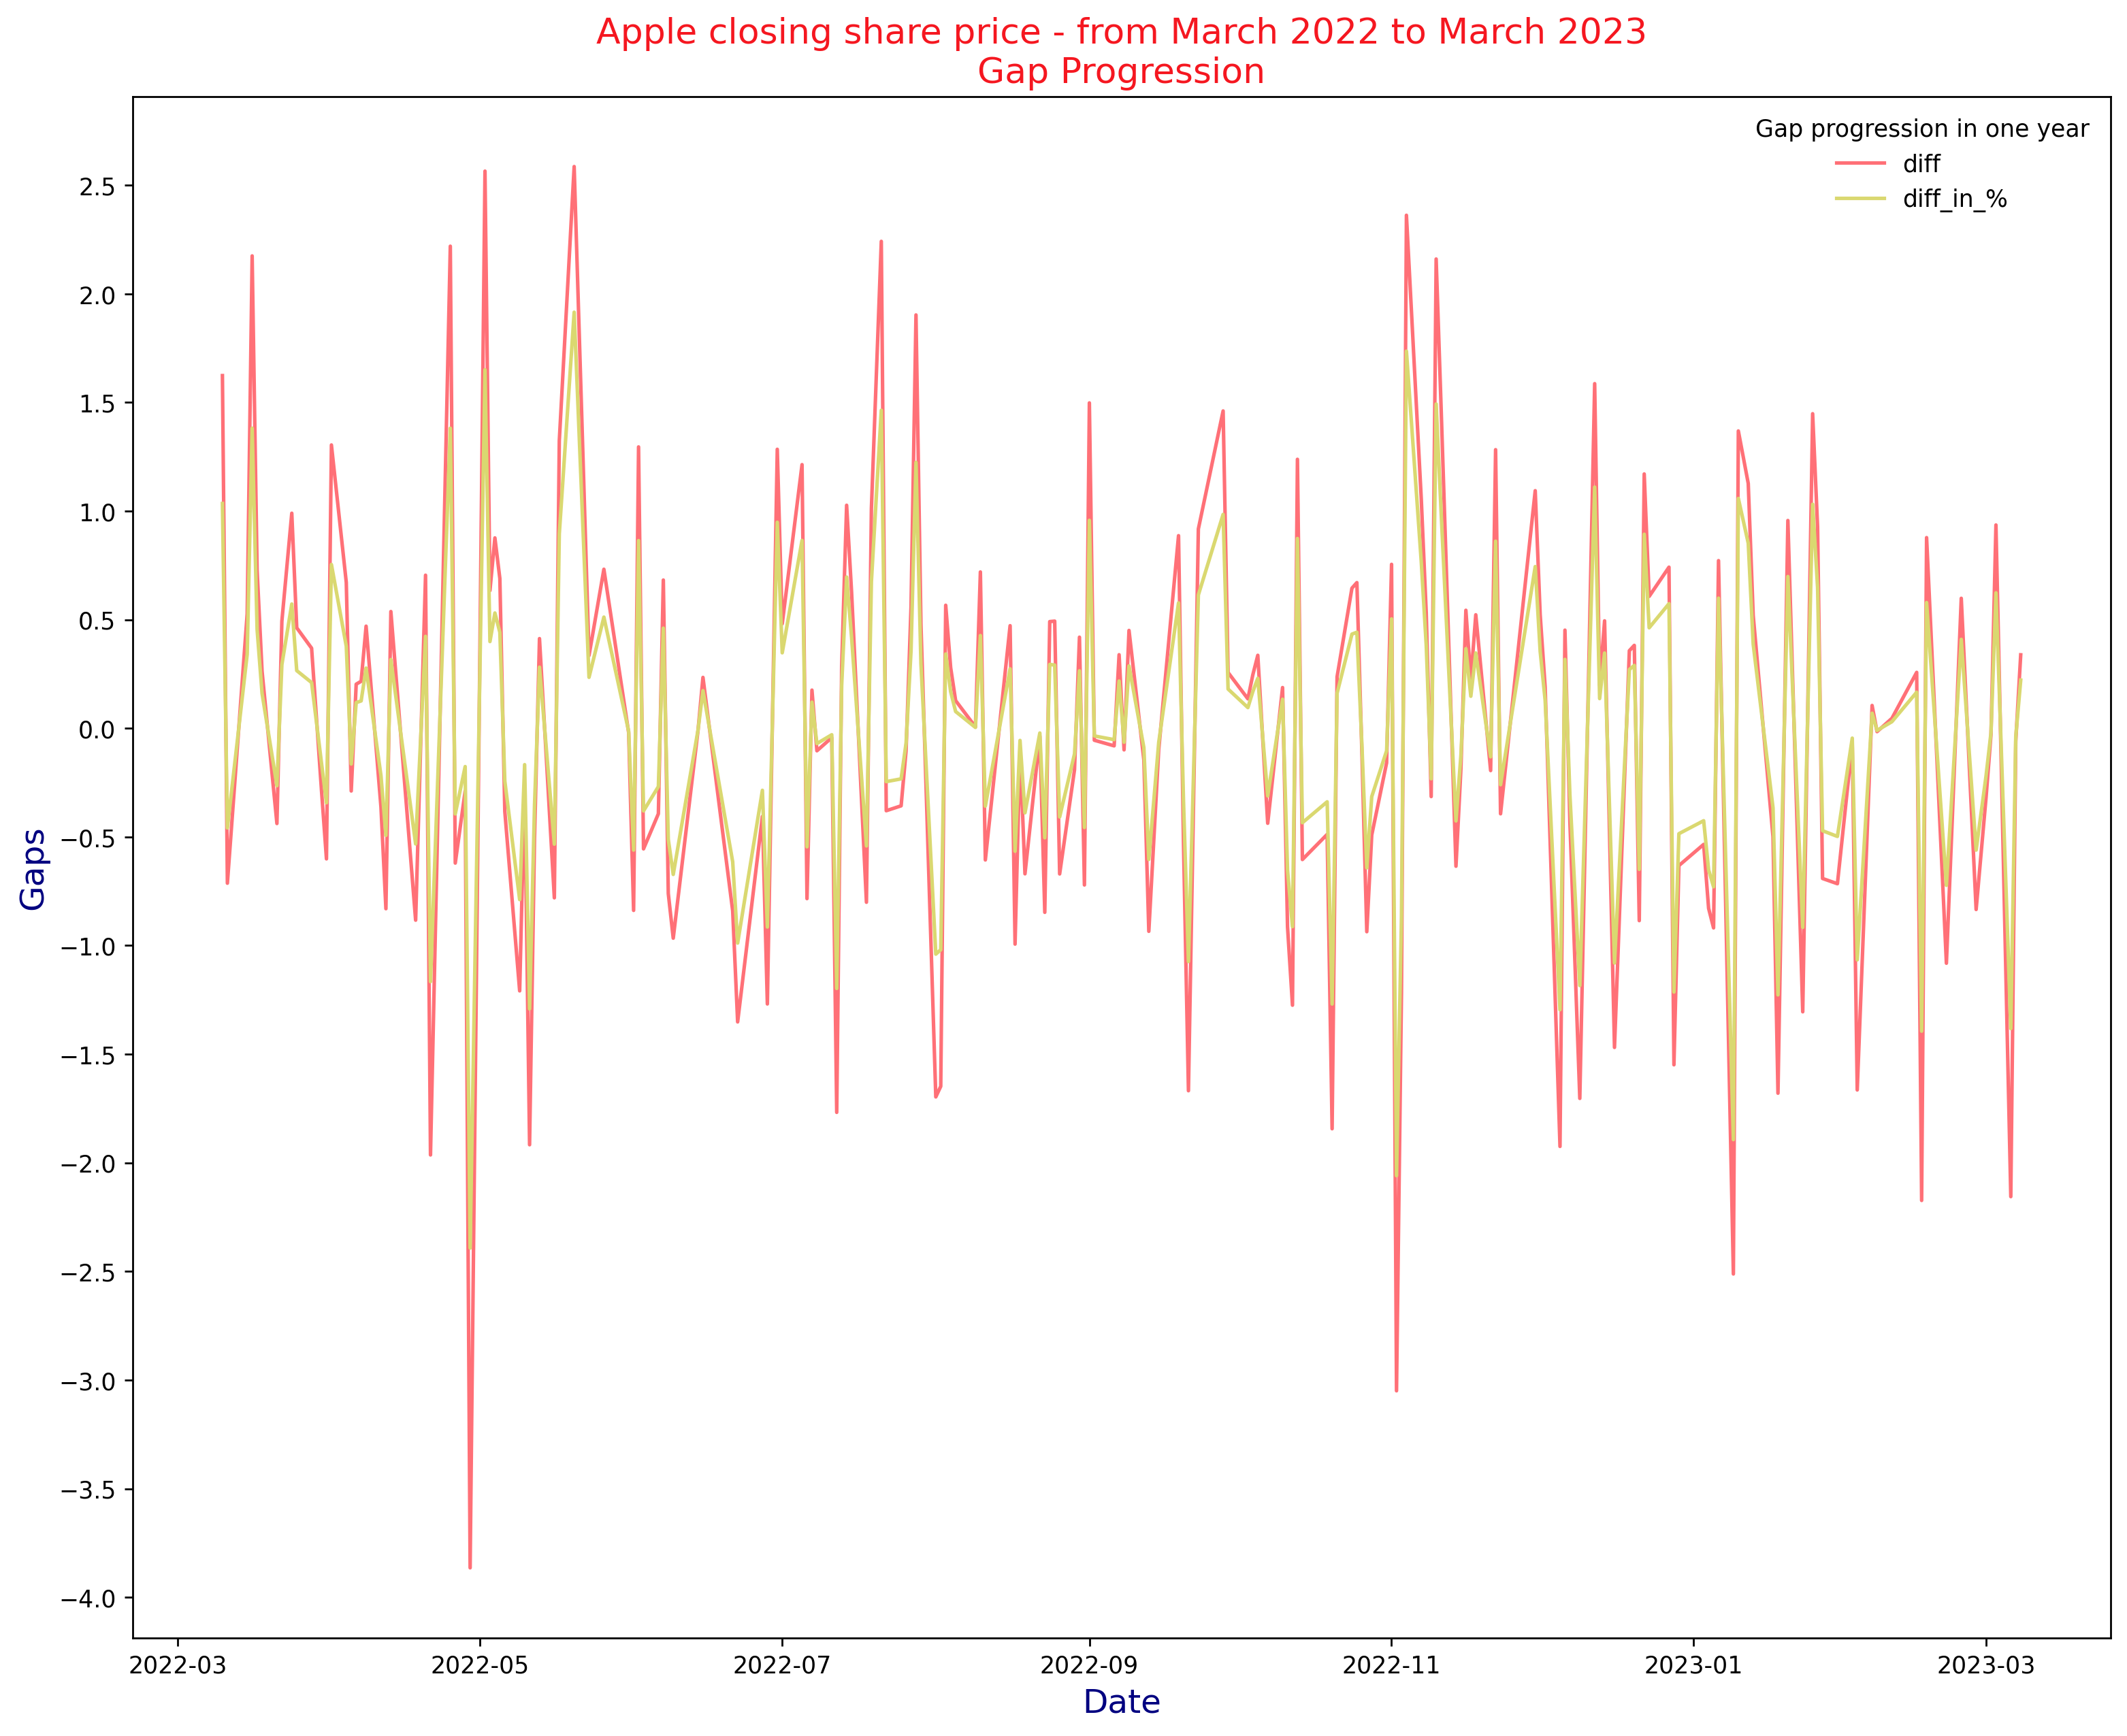

In [62]:
# Create figure 
fig, ax = plt.subplots(figsize=(15, 12), dpi=250)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='diff', data=predicted_rl, legend=True, color='#FF7077')
ax= sns.lineplot(x='Date', y='diff_in_%', data=predicted_rl, legend=True, color='#DAD870')

plt.title("Apple closing share price - from March 2022 to March 2023\nGap Progression", color='#F51720', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Gaps', size=14, color='navy')
ax.legend(loc='best', title='Gap progression in one year', frameon=False, ncol= 1, 
          labels=['diff', 'diff_in_%'])
ax.set_yticks(np.arange(-4,3,0.5))
plt.show();

The graph below showing the spread curves clearly shows that the range of values is rather small. This minimizes the investment risk, which ranges from -2.39% to 1.91%.

<a id='4.2'></a>
# <font color='#900020'>4.2 Predicted values with Random Forest Regressor</font>

In [63]:
predicted_rf = pd.DataFrame(y_train)
predicted_rf['Predicted_values_rf'] = y_pred_rfr_train
predicted_rf['diff'] = predicted_rf['Close/Last'] - predicted_rf['Predicted_values_rf']
predicted_rf

,Close/Last,Predicted_values_rf,diff
Date,,,
2022-08-26,163.62,165.0335,-1.4135
2022-04-13,170.40,169.7351,0.6649
2022-03-25,174.72,174.5410,0.1790
2022-09-15,152.37,152.7307,-0.3607
2022-08-22,167.57,168.1393,-0.5693
...,...,...,...
2022-10-04,146.10,145.4874,0.6126
2023-02-15,155.33,154.7649,0.5651
2022-10-24,149.45,149.3308,0.1192


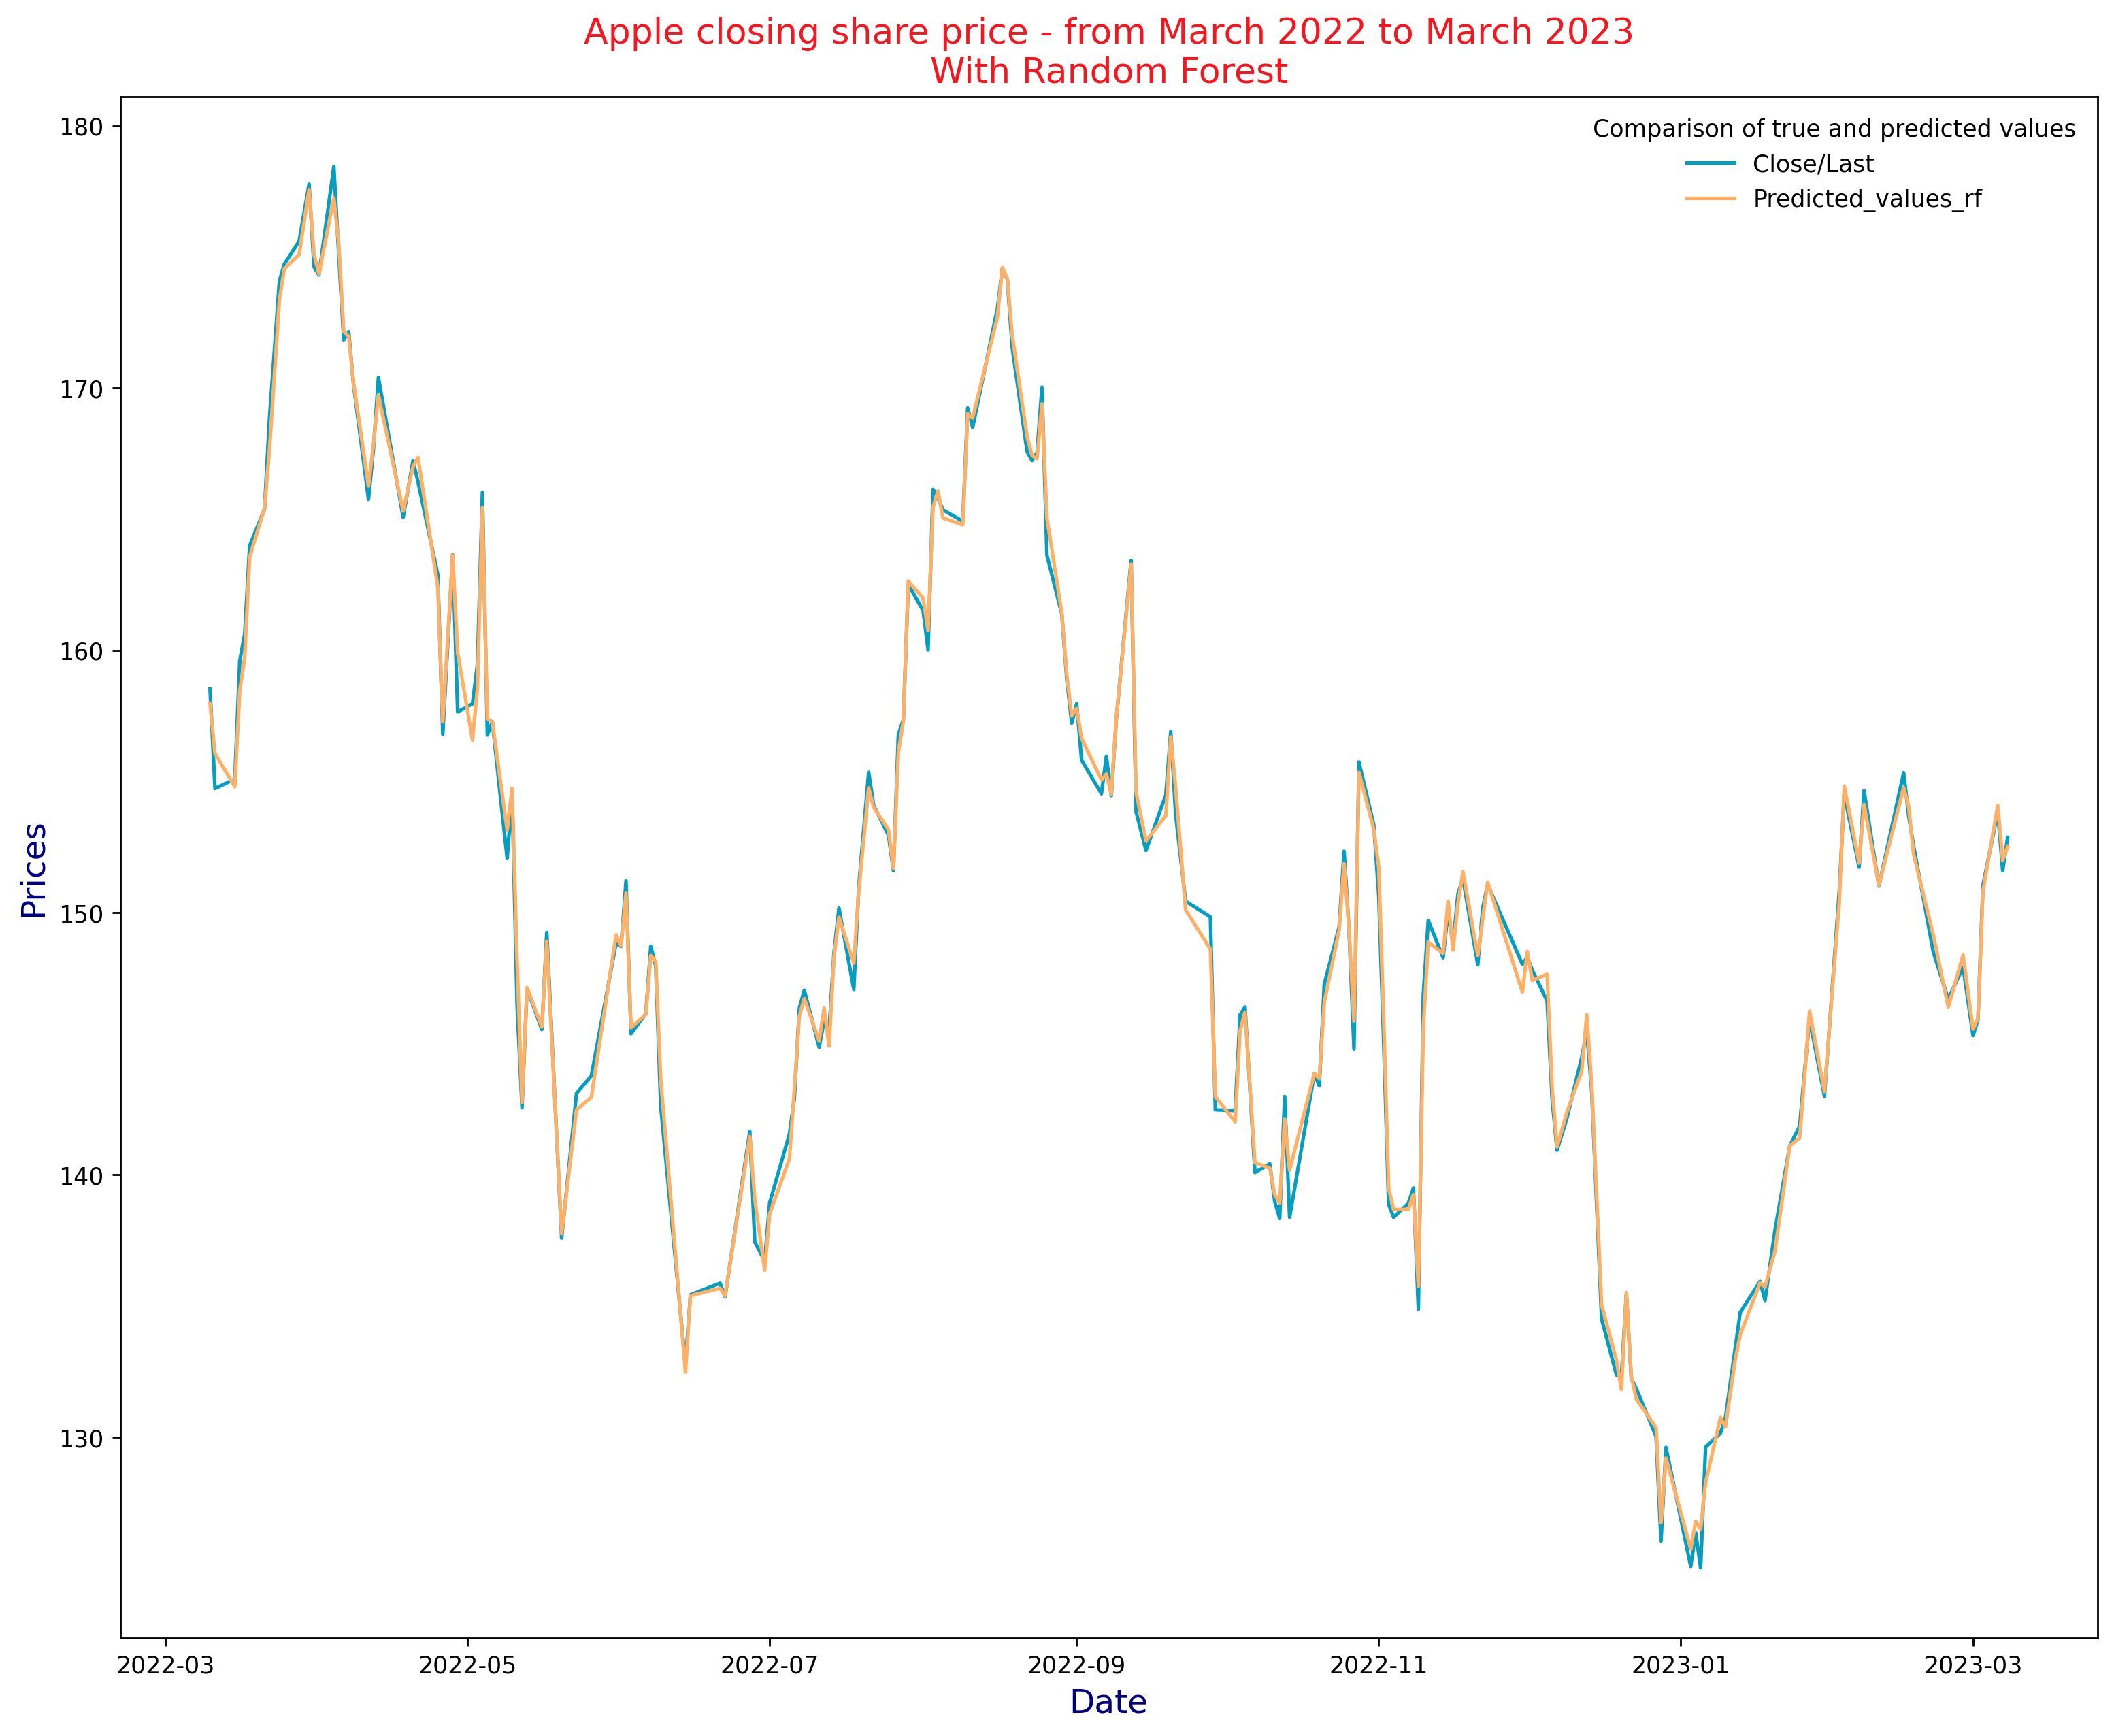

In [64]:
# Create figure 
fig, ax = plt.subplots(figsize=(15, 12), dpi=250)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='Close/Last', data=predicted_rf, legend=True, color='#059DC0')
ax= sns.lineplot(x='Date', y='Predicted_values_rf', data=predicted_rf, legend=True, color='#FFB067')

plt.title("Apple closing share price - from March 2022 to March 2023\nWith Random Forest", color='#F51720', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Prices', size=14, color='navy')
ax.legend(loc='best', title='Comparison of true and predicted values', frameon=False, ncol= 1, 
          labels=['Close/Last', 'Predicted_values_rf'])
plt.show();

In [65]:
# Creation of 'diff' and 'gap_in_%' variables to compare the difference between the actual value and the predicted value. 
predicted_rf['diff'] = predicted_rf['Close/Last'] - predicted_rf['Predicted_values_rf']
predicted_rf['gap_in_%'] = predicted_rf['diff']/predicted_rf['Predicted_values_rf']*100
predicted_rf

,Close/Last,Predicted_values_rf,diff,gap_in_%
Date,,,,
2022-08-26,163.62,165.0335,-1.4135,-0.856493
2022-04-13,170.40,169.7351,0.6649,0.391728
2022-03-25,174.72,174.5410,0.1790,0.102555
2022-09-15,152.37,152.7307,-0.3607,-0.236167
2022-08-22,167.57,168.1393,-0.5693,-0.338588
...,...,...,...,...
2022-10-04,146.10,145.4874,0.6126,0.421067
2023-02-15,155.33,154.7649,0.5651,0.365134
2022-10-24,149.45,149.3308,0.1192,0.079823


In [66]:
# The 10 highest differences 
predicted_rf.nlargest(10, 'gap_in_%', keep='all')

,Close/Last,Predicted_values_rf,diff,gap_in_%
Date,,,,
2023-01-06,129.62,128.2662,1.3538,1.055461
2022-05-02,157.96,156.5753,1.3847,0.884367
2022-11-10,146.87,145.6267,1.2433,0.853758
2022-09-28,149.84,148.6043,1.2357,0.831537
2022-11-30,148.03,146.9675,1.0625,0.722949
2022-03-16,159.59,158.4529,1.1371,0.717626
2022-03-22,168.82,167.6324,1.1876,0.708455
2022-04-04,178.44,177.2399,1.2001,0.677105
2022-07-05,141.56,140.6201,0.9399,0.668397


In [67]:
# The 10 smallest differences 
predicted_rf.nsmallest(10, 'gap_in_%', keep='all')

,Close/Last,Predicted_values_rf,diff,gap_in_%
Date,,,,
2022-04-29,157.65,159.9023,-2.2523,-1.408548
2022-10-14,138.38,140.1792,-1.7992,-1.283500
2022-06-28,137.44,139.0732,-1.6332,-1.174346
2023-01-05,125.02,126.4873,-1.4673,-1.160037
2022-05-11,146.50,148.1979,-1.6979,-1.145698
2022-08-26,163.62,165.0335,-1.4135,-0.856493
2022-03-11,154.73,156.0616,-1.3316,-0.853253
2022-10-27,144.80,145.8610,-1.0610,-0.727405
2022-11-01,150.65,151.7338,-1.0838,-0.714277


In [70]:
predicted_rf.describe()

,Close/Last,Predicted_values_rf,diff,gap_in_%
count,200.000000,200.000000,200.000000,200.000000
mean,150.912700,150.931996,-0.019296,-0.015249
std,12.013281,11.952673,0.602613,0.405263
min,125.020000,125.731600,-2.252300,-1.408548
25%,142.972500,143.126725,-0.354100,-0.236423
50%,149.940000,149.560200,-0.028250,-0.018538
75%,157.727500,157.569475,0.360800,0.256291
max,178.440000,177.561100,1.384700,1.055461


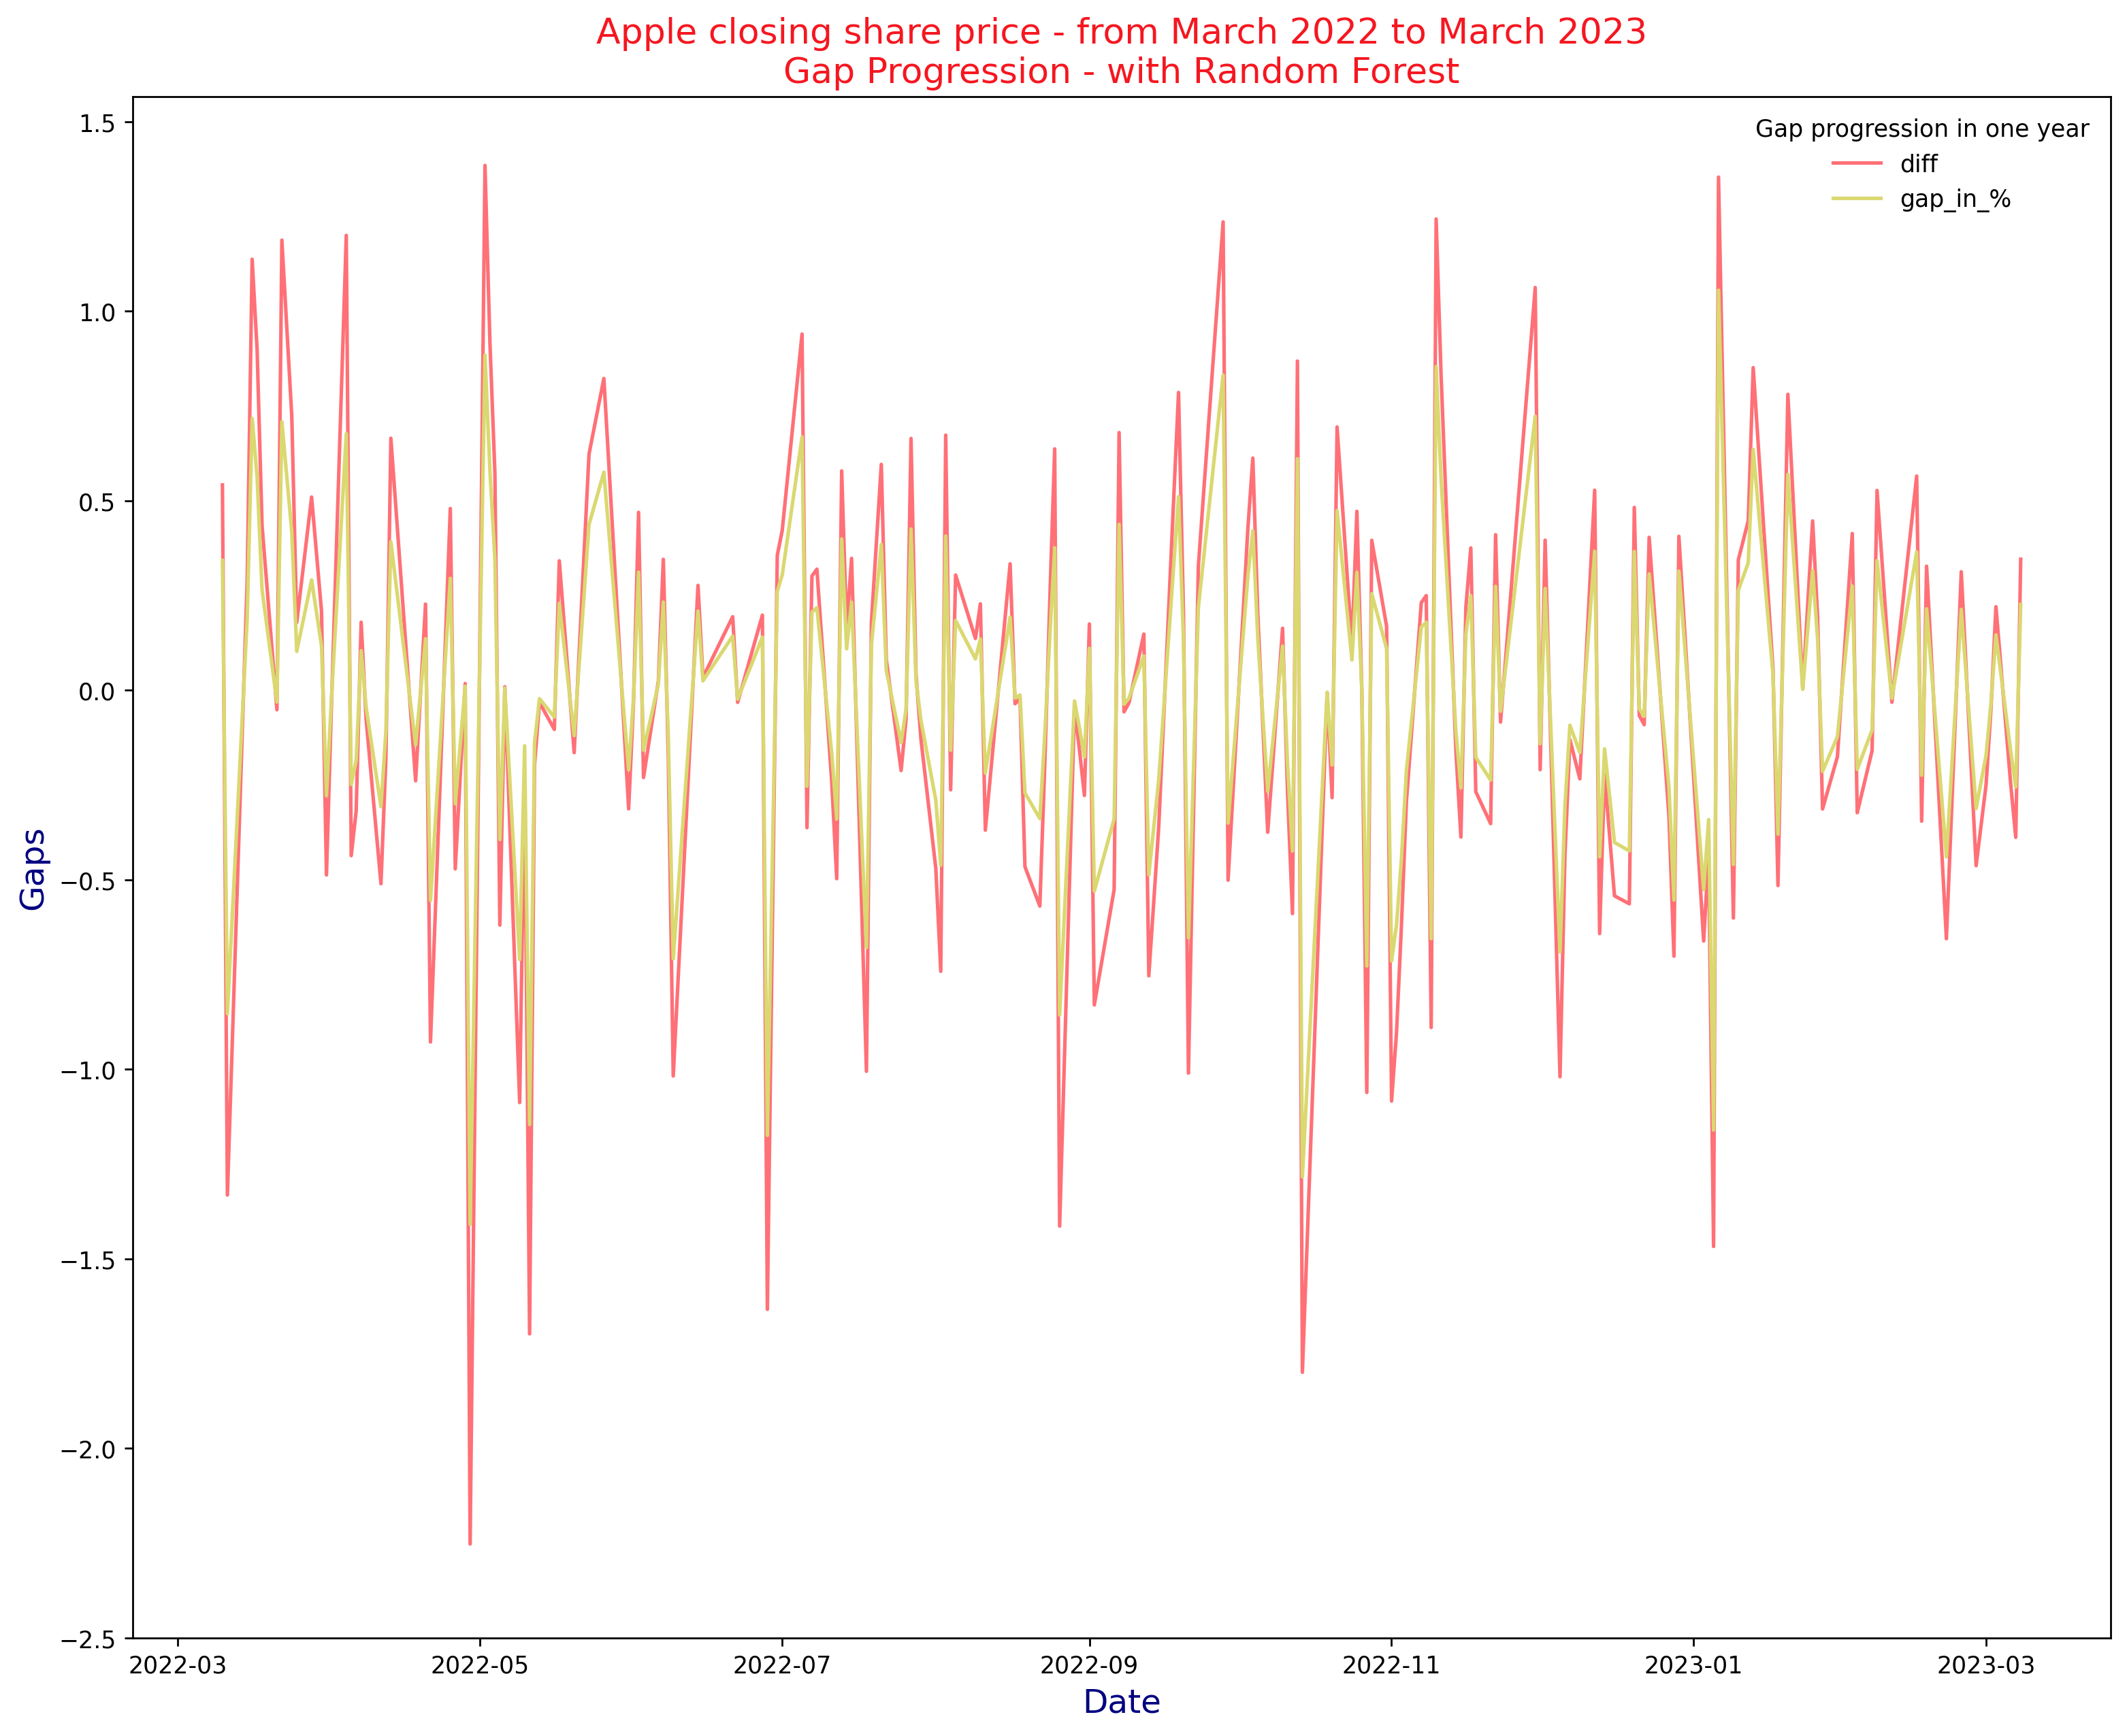

In [69]:
# Create figure 
fig, ax = plt.subplots(figsize=(15, 12), dpi=250)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='diff', data=predicted_rf, legend=True, color='#FF7077')
ax= sns.lineplot(x='Date', y='gap_in_%', data=predicted_rf, legend=True, color='#DAD870')

plt.title("Apple closing share price - from March 2022 to March 2023\nGap Progression - with Random Forest", color='#F51720', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Gaps', size=14, color='navy')
ax.legend(loc='best', title='Gap progression in one year', frameon=False, ncol= 1, 
          labels=['diff', 'gap_in_%'])
ax.set_yticks(np.arange(-2.5,2,0.5))
plt.show();

With Random Forest Regressor, the range between actual and predicted values is smaller than with Linear Regression (-2.39% and 1.91%). In fact, Random Forest Regressor shows deviations between -1.41% and 1.055%. This is smaller than with Linear Regression. This also means that the Random Forest Regressor model is more accurate and closer to the actual values. 

**Random Forest Regressor is the most suitable model for this kind of prediction. If you were to invest in Apple shares, you'd be better off relying on the predictions of Random Forest Regressor.**